In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv("C:/Kaggle/input/prudential-life-insurance-assessment/medical_costs.csv")
df

,Age,Sex,BMI,Children,Smoker,Region,Medical Cost
0,58,male,15.6,2,yes,northwest,17907.54
1,24,male,29.8,0,yes,northeast,16312.64
2,50,male,29.0,5,no,northwest,6819.21
3,35,male,34.0,1,no,southeast,5247.87
4,31,female,17.6,3,yes,southeast,17525.49
...,...,...,...,...,...,...,...
9995,24,female,26.9,2,yes,southeast,16551.53
9996,49,female,33.4,3,no,northeast,6376.05
9997,52,female,38.1,5,yes,northwest,18760.27
9998,24,male,33.4,4,no,northwest,5471.91


In [454]:
df.isnull().sum()

Age             0
Sex             0
BMI             0
Children        0
Smoker          0
Region          0
Medical Cost    0
dtype: int64

In [455]:
df.duplicated().value_counts()

False    10000
Name: count, dtype: int64

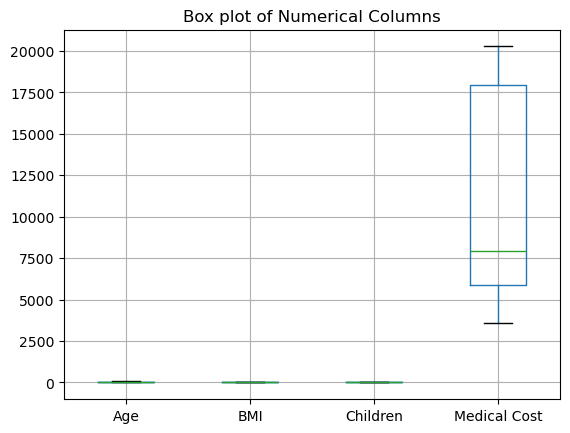

In [456]:
#check for outliers in numerical columns
df.boxplot(column=['Age', 'BMI', 'Children', 'Medical Cost']) 
plt.title('Box plot of Numerical Columns')
plt.show()

In [457]:
df.describe()

,Age,BMI,Children,Medical Cost
count,10000.000000,10000.00000,10000.000000,10000.000000
mean,41.678400,27.40301,2.501700,11898.932216
std,13.807724,7.22896,1.701672,6073.875834
min,18.000000,15.00000,0.000000,3617.090000
25%,30.000000,21.10000,1.000000,5909.925000
50%,42.000000,27.40000,2.000000,7957.430000
75%,54.000000,33.70000,4.000000,17931.962500
max,65.000000,40.00000,5.000000,20268.210000


In [458]:
def get_categorical_codes(df, column_name):
    data_categorical = df[column_name].astype('category')
    #print(data_categorical)
    codes = data_categorical.cat.codes
    #print("Category Codes:\n", codes)
    #print(codes)
    categories = data_categorical.cat.categories
    #print("Categories:\n", categories)
    unique_values = codes.unique() 
    #print(unique_values)
    for value in unique_values:
        original_category = categories[value]
        print(f"Original category for code {value}: {original_category}")

In [459]:
get_categorical_codes(df, 'Sex')

Original category for code 1: male
Original category for code 0: female


In [460]:
get_categorical_codes(df, 'Smoker')

Original category for code 1: yes
Original category for code 0: no


In [461]:
get_categorical_codes(df, 'Region')

Original category for code 1: northwest
Original category for code 0: northeast
Original category for code 2: southeast
Original category for code 3: southwest


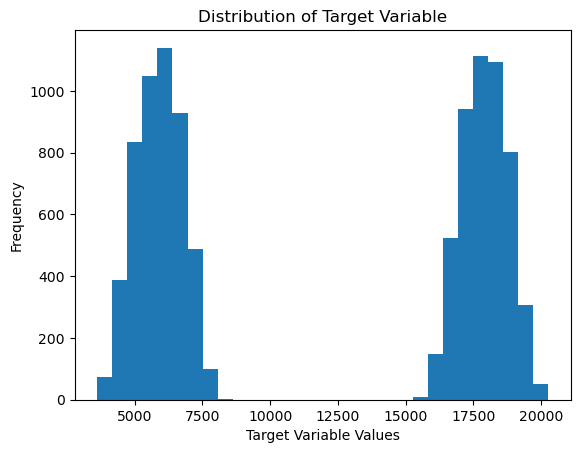

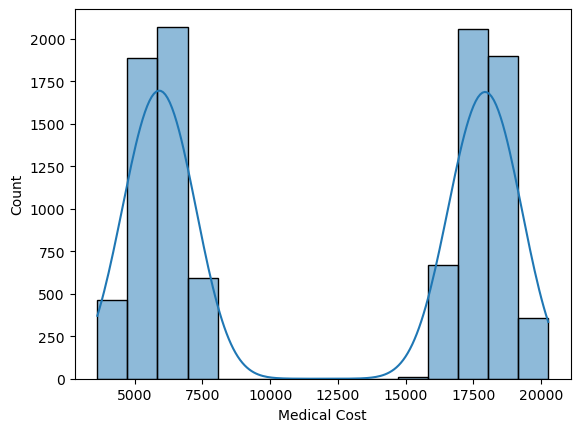

In [462]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and 'target_variable' is the column name
plt.hist(df['Medical Cost'], bins=30)
plt.xlabel('Target Variable Values')
plt.ylabel('Frequency')
plt.title('Distribution of Target Variable')
plt.show()

sns.histplot(df['Medical Cost'], kde=True) # with density curve
plt.show()

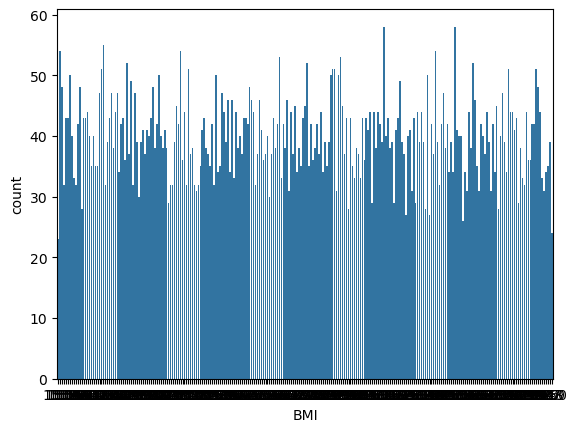

In [463]:
sns.countplot(x='BMI', data = df)
plt.show()

In [464]:
df.head

<bound method NDFrame.head of       Age     Sex   BMI  Children Smoker     Region  Medical Cost
0      58    male  15.6         2    yes  northwest      17907.54
1      24    male  29.8         0    yes  northeast      16312.64
2      50    male  29.0         5     no  northwest       6819.21
3      35    male  34.0         1     no  southeast       5247.87
4      31  female  17.6         3    yes  southeast      17525.49
...   ...     ...   ...       ...    ...        ...           ...
9995   24  female  26.9         2    yes  southeast      16551.53
9996   49  female  33.4         3     no  northeast       6376.05
9997   52  female  38.1         5    yes  northwest      18760.27
9998   24    male  33.4         4     no  northwest       5471.91
9999   24  female  21.7         5     no  southwest       4952.24

[10000 rows x 7 columns]>

In [465]:
df['Sex'] = df['Sex'].astype('category').cat.codes

In [466]:
df['Smoker'] = df['Smoker'].astype('category').cat.codes

In [467]:
df['Region'] = df['Region'].astype('category').cat.codes

In [468]:
df

,Age,Sex,BMI,Children,Smoker,Region,Medical Cost
0,58,1,15.6,2,1,1,17907.54
1,24,1,29.8,0,1,0,16312.64
2,50,1,29.0,5,0,1,6819.21
3,35,1,34.0,1,0,2,5247.87
4,31,0,17.6,3,1,2,17525.49
...,...,...,...,...,...,...,...
9995,24,0,26.9,2,1,2,16551.53
9996,49,0,33.4,3,0,0,6376.05
9997,52,0,38.1,5,1,1,18760.27
9998,24,1,33.4,4,0,1,5471.91


In [469]:
correlation_matrix = df.corr()
correlations_with_target = correlation_matrix['Medical Cost'] # Get correlations of features with the target variable
print(correlations_with_target.sort_values(ascending=False)) # Print the correlations in descending order

Medical Cost    1.000000
Smoker          0.990141
Age             0.125649
Children        0.069575
BMI             0.035249
Region         -0.002428
Sex            -0.003113
Name: Medical Cost, dtype: float64


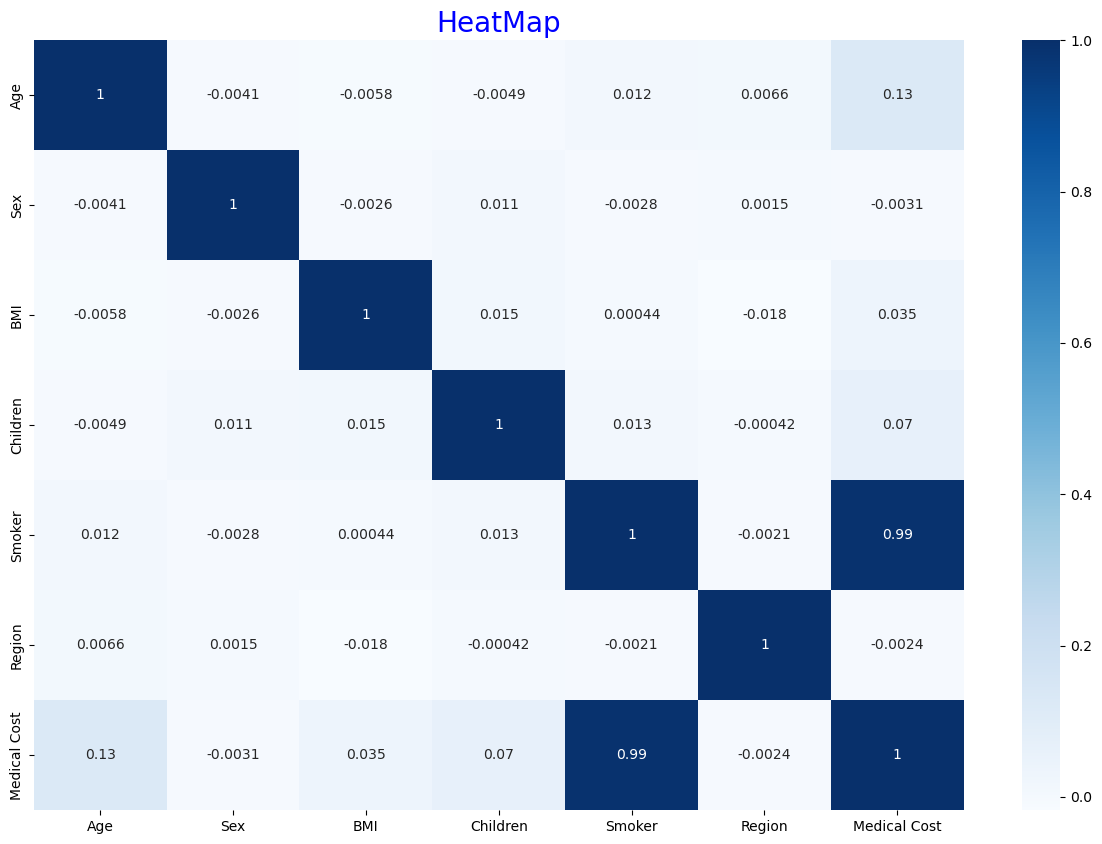

In [470]:
# plot heatmap and check the correlation between features
fig , ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap="Blues",ax=ax)
ax.set_title("HeatMap",size=20,color="blue");

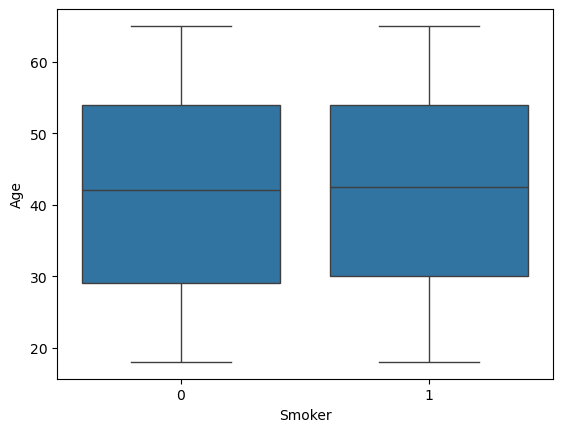

In [471]:
sns.boxplot(x='Smoker', y='Age', data = df)
plt.show()

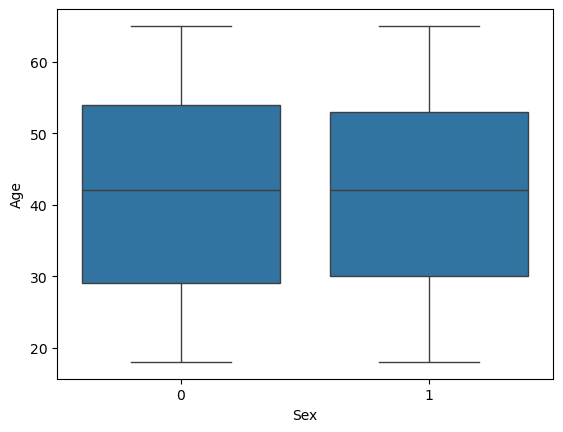

In [472]:
sns.boxplot(x='Sex', y='Age', data = df)
plt.show()

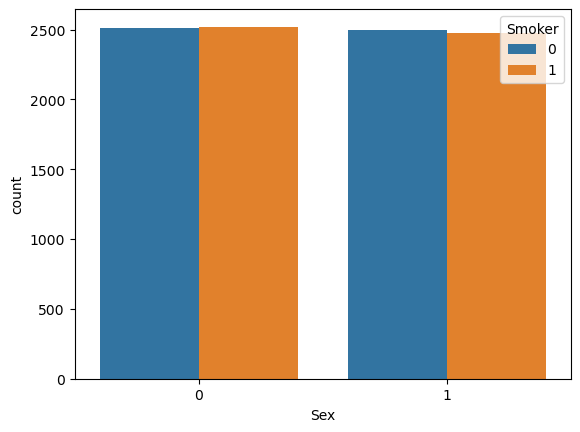

In [473]:
sns.countplot(x='Sex', data = df, hue='Smoker')
plt.show()

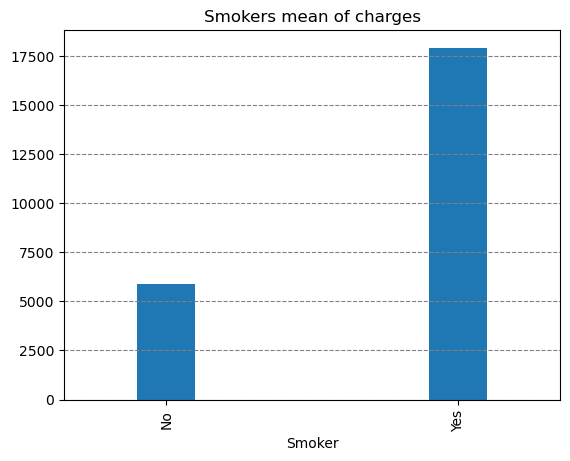

In [474]:
# grouped data into smokers and get mean values on "medical cost" columns
fig , ax = plt.subplots()
df.groupby("Smoker").mean()["Medical Cost"].plot(kind="bar",ax=ax,width=0.2)
ax.set(title="Smokers mean of charges",xticks=[0,1],
       xticklabels=["No","Yes"])
ax.grid(axis="y",ls="--",color="gray")

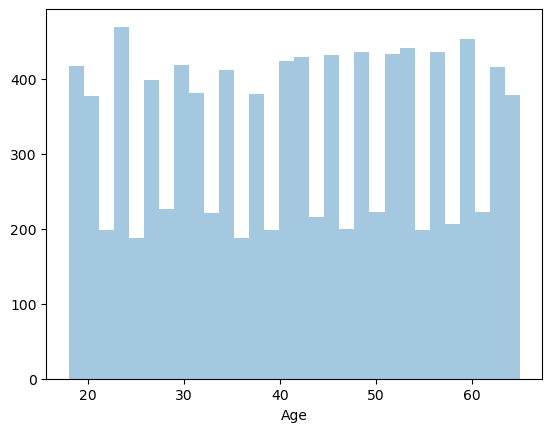

In [475]:
sns.distplot(df['Age'], kde=False, bins=30)
plt.show()

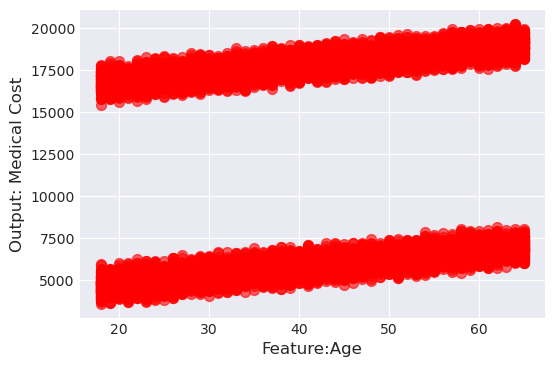

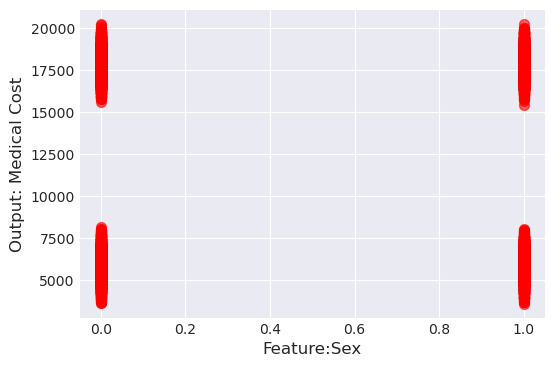

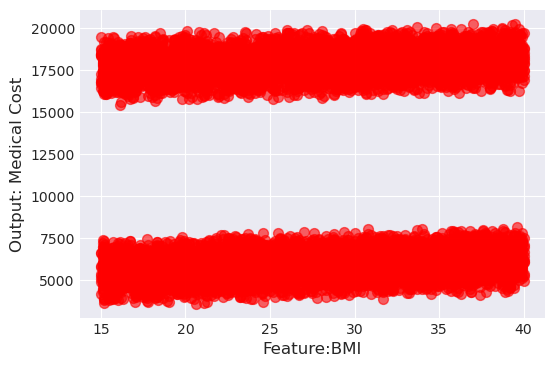

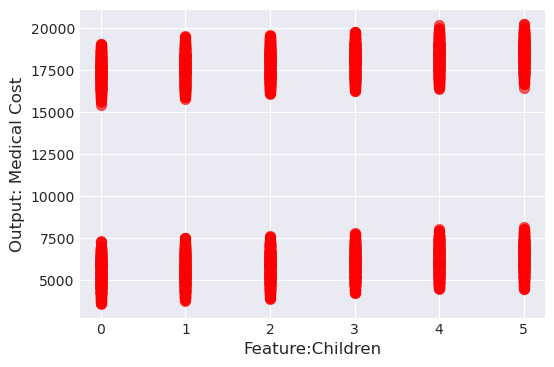

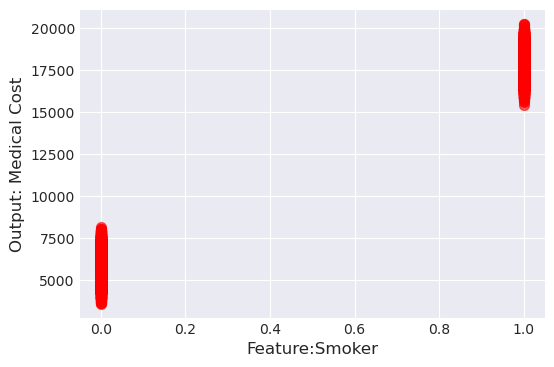

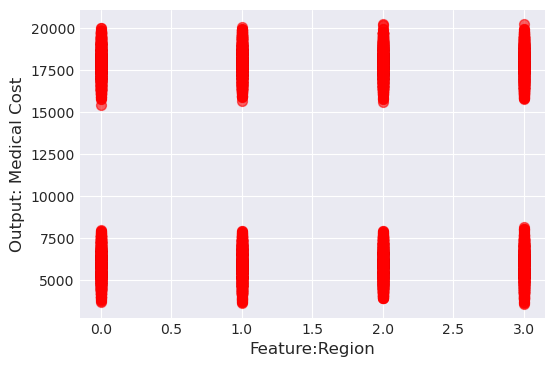

In [476]:
with plt.style.context(('seaborn-v0_8-dark')):
    for i,col in enumerate(df.columns[:-1]):
        plt.figure(figsize=(6,4))
        plt.grid(True)
        plt.xlabel('Feature:'+col,fontsize=12)
        plt.ylabel('Output: Medical Cost',fontsize=12)
        plt.scatter(df[col],df['Medical Cost'],c='red',s=50,alpha=0.6)


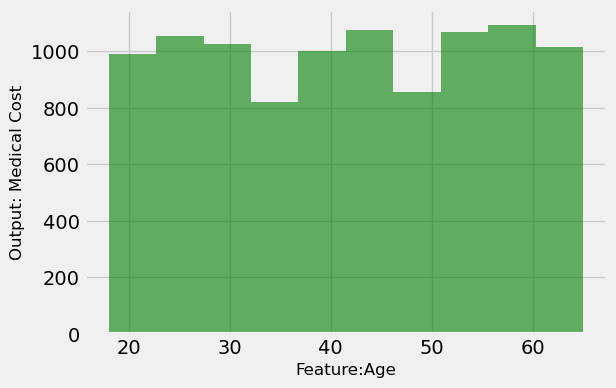

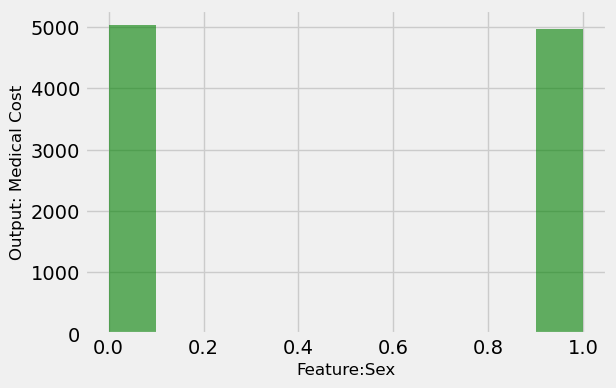

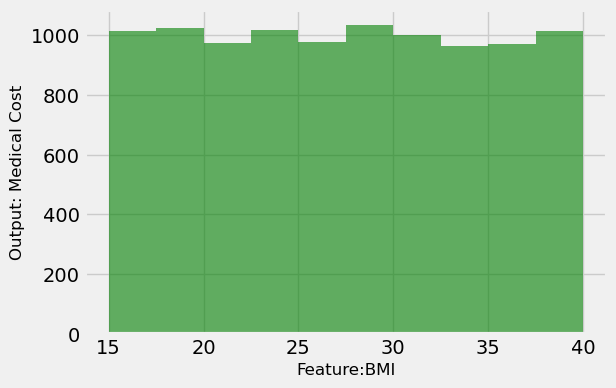

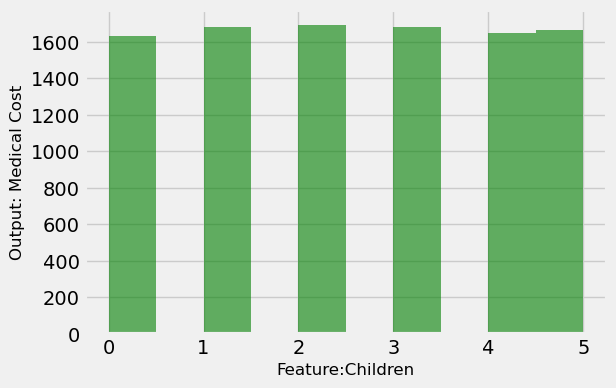

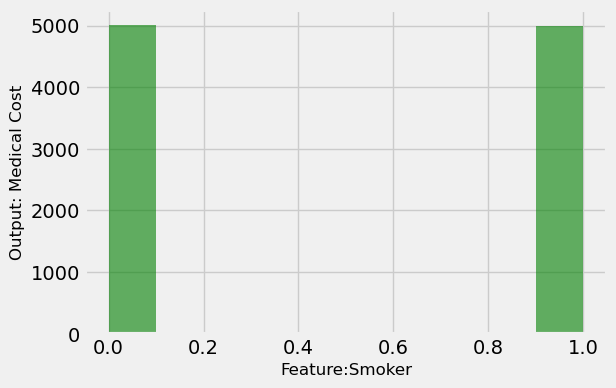

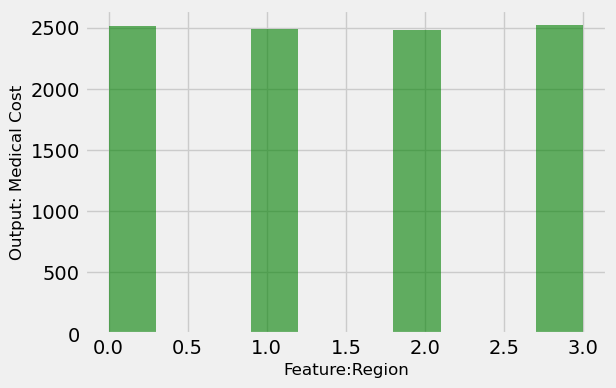

In [477]:
with plt.style.context(('fivethirtyeight')):
    for i,col in enumerate(df.columns[:-1]):
        plt.figure(figsize=(6,4))
        plt.grid(True)
        plt.xlabel('Feature:'+col,fontsize=12)
        plt.ylabel('Output: Medical Cost',fontsize=12)
        plt.hist(df[col],alpha=0.6,facecolor='g')

In [478]:
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [479]:
X = df.drop(columns=['Medical Cost'])
y = df['Medical Cost']

In [480]:
X

,Age,Sex,BMI,Children,Smoker,Region
0,58,1,15.6,2,1,1
1,24,1,29.8,0,1,0
2,50,1,29.0,5,0,1
3,35,1,34.0,1,0,2
4,31,0,17.6,3,1,2
...,...,...,...,...,...,...
9995,24,0,26.9,2,1,2
9996,49,0,33.4,3,0,0
9997,52,0,38.1,5,1,1
9998,24,1,33.4,4,0,1


In [481]:
y

0       17907.54
1       16312.64
2        6819.21
3        5247.87
4       17525.49
          ...   
9995    16551.53
9996     6376.05
9997    18760.27
9998     5471.91
9999     4952.24
Name: Medical Cost, Length: 10000, dtype: float64

<Axes: ylabel='Density'>

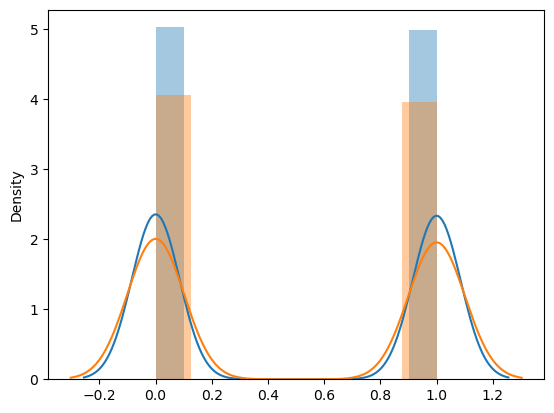

In [482]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.3, shuffle = True, random_state=42)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
sns.distplot(X_train[:,1])
sns.distplot(X_test[:,1])

In [483]:
#Define the model parameters
model = xgb.XGBRegressor(
    objective='reg:squarederror', # For regression tasks
    n_estimators=80,            # Number of boosting rounds - 1500
    learning_rate=0.1,          # Step size shrinkage - 0.1
    max_depth=4,                 # Maximum depth of trees - 4
    #subsample=0.7,               # Fraction of samples to use per tree
    #colsample_bytree=0.8,       # Fraction of features to use per tree  
    early_stopping_rounds=20,    # early Stopping rounds - 20
)

In [484]:
model.fit(X_train, y_train, 
          eval_set=[(X_train, y_train), (X_test, y_test)], 
          verbose=50,
         )

[0]	validation_0-rmse:5476.56718	validation_1-rmse:5457.74946
[50]	validation_0-rmse:283.79263	validation_1-rmse:300.90478
[79]	validation_0-rmse:277.03912	validation_1-rmse:297.71892


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=20,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=80,
             n_jobs=None, num_parallel_tree=None, ...)

In [485]:
# Make predictions
y_pred = model.predict(X_test)

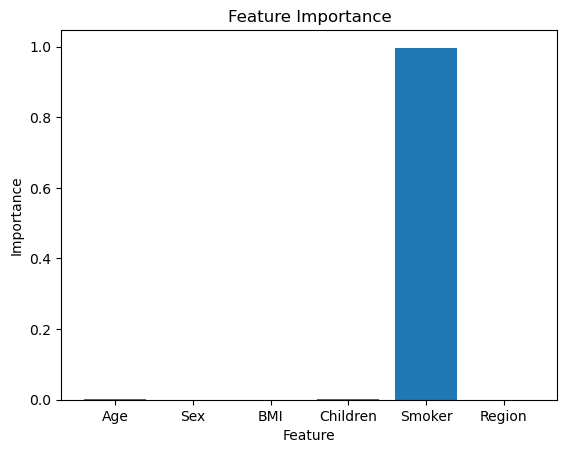

In [486]:
# Get feature importance
importance = model.feature_importances_
# Plot feature importance
feature_names = [f'{i}' for i in X.columns]
plt.bar(feature_names, importance)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.show()

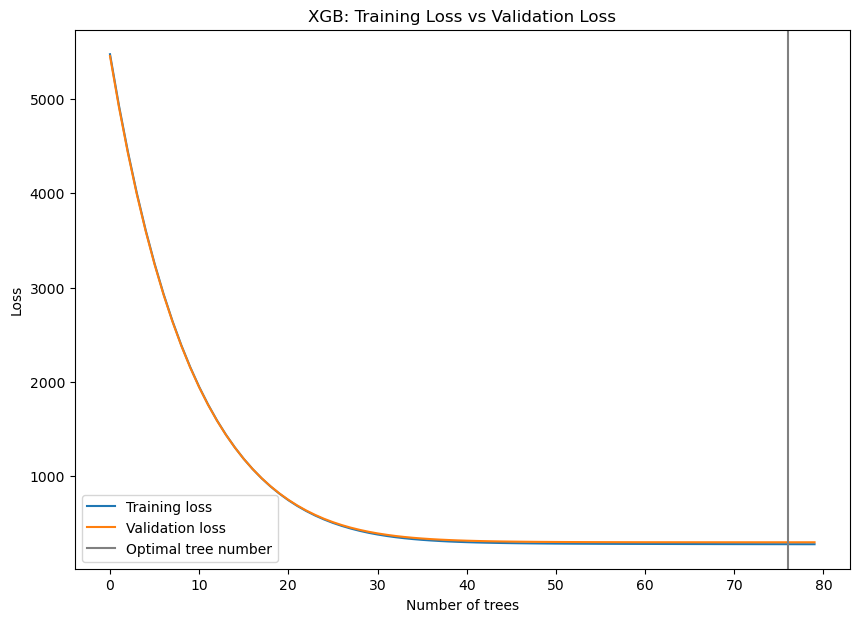

In [487]:
results = model.evals_result()
plt.figure(figsize=(10,7))
plt.plot(results["validation_0"]["rmse"], label="Training loss")
plt.plot(results["validation_1"]["rmse"], label="Validation loss")
plt.axvline(model.best_iteration, color="gray", label="Optimal tree number")
plt.title("XGB: Training Loss vs Validation Loss")
plt.xlabel("Number of trees")
plt.ylabel("Loss")
plt.legend()

In [488]:
model.best_iteration

76

In [489]:
# Evaluate the model (MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_pred, y_test)
print("Mean Squared Error = ", mse)

# Evaluate the model (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred)) 
print("RMSE : % f" %(rmse))

# Evaluate the model (MAE)
from sklearn.metrics import mean_absolute_error
# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

from sklearn.metrics import mean_absolute_percentage_error
# Evaluate the model (MAPE)
mape_value_sklearn = mean_absolute_percentage_error(y_test, y_pred)
print("MAPE:", mape_value_sklearn)

from sklearn.metrics import r2_score
# Evaluate the model (R2 score)
r2 = r2_score(y_test, y_pred)
print('r2 score for the model is', r2)

Mean Squared Error =  88591.12749509653
RMSE :  297.642617
Mean Absolute Error: 256.65317498046875
MAPE: 0.029384157486869206
r2 score for the model is 0.9975863570699055


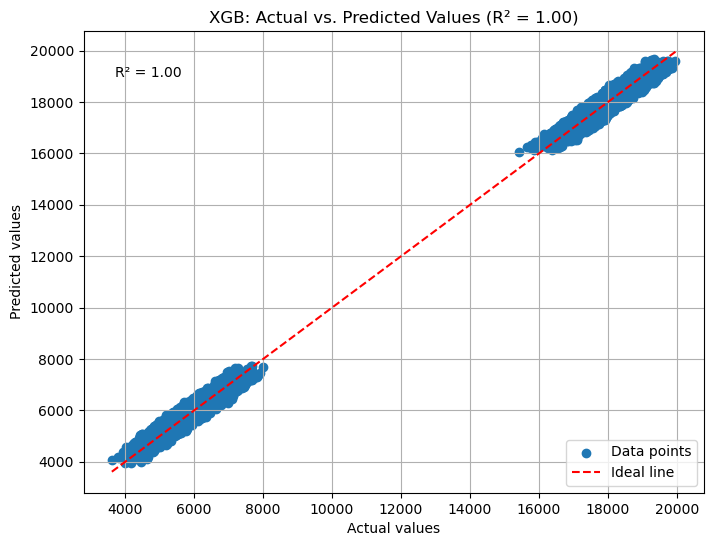

In [490]:
# Create the plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, label='Data points')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title(f'XGB: Actual vs. Predicted Values (R² = {r2:.2f})')

# Add R-squared annotation
plt.annotate(f'R² = {r2:.2f}', xy=(0.05, 0.9), xycoords='axes fraction')

# Plot the ideal line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Ideal line')

plt.legend()
plt.grid(True)
plt.show()

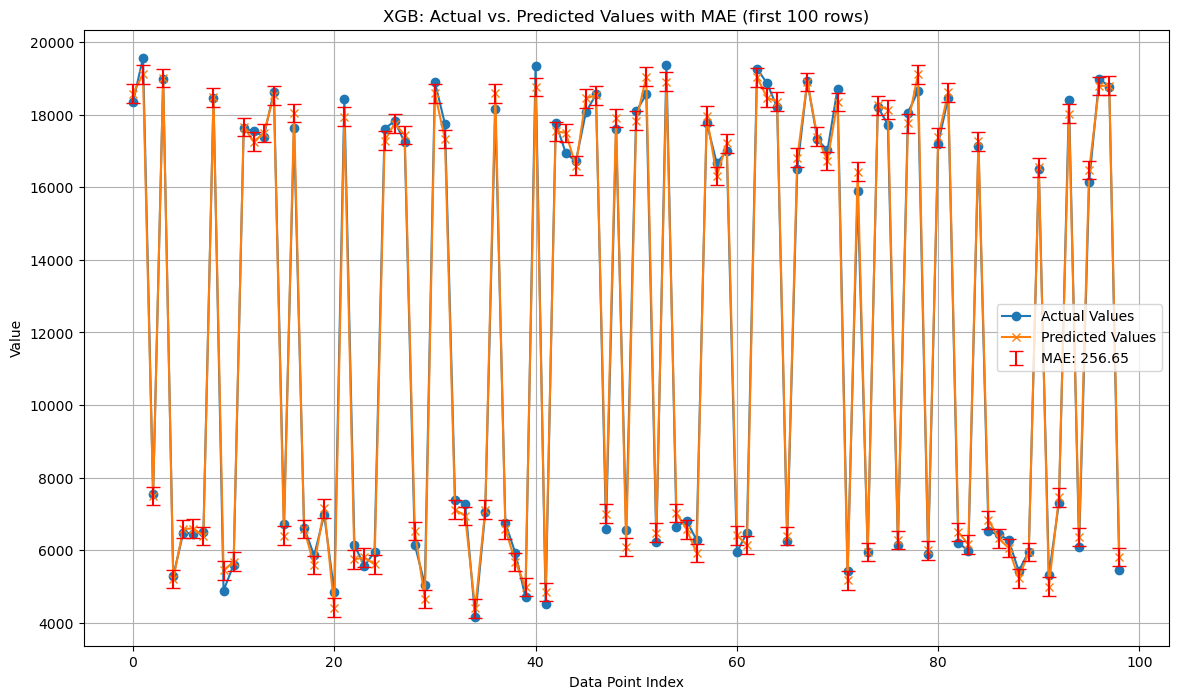

In [491]:
# Create plot to visualize MAE
plt.figure(figsize=(14, 8))
plt.plot(y_test[1:100], label='Actual Values', marker='o')
plt.plot(y_pred[1:100], label='Predicted Values', marker='x')

# Add error bars to visualize the MAE
x_coords = np.arange(len(y_test[1:100]))
plt.errorbar(x_coords, y_pred[1:100], yerr=mae, fmt='none', ecolor='red', capsize=5, label=f'MAE: {mae:.2f}')

plt.xlabel('Data Point Index')
plt.ylabel('Value')
plt.title('XGB: Actual vs. Predicted Values with MAE (first 100 rows)')
plt.legend()
plt.grid(True)
plt.show()

In [492]:
import joblib
# save the model to a file
joblib.dump(model, 'XGB_regression_model_newdata.joblib')
# the First parameter is the name of the model and the second parameter is the name of the file
# with which we want to save it

['XGB_regression_model_newdata.joblib']

In [493]:
input_data = [35,1,34.0,1,0,2]
input_data_array=np.array(input_data)
print(input_data_array.shape)
input_data_array_T= input_data_array.reshape(1,6)
print(input_data_array_T.shape)

(6,)
(1, 6)


In [494]:
def predict_value(model_path, input_data):
    # """
    # Predicts values using a trained model.

    # Args:
    #     model_path (str): Path to the saved model file (e.g., .pkl, .joblib).
    #     input_data (array-like): Input data for prediction.

    # Returns:
    #     array-like: Predicted values.
    # """
    # Load the trained model
    model = joblib.load(model_path)
    
    # Make predictions
    predictions = model.predict(input_data)
    
    return predictions

In [495]:
predict_value('XGB_regression_model_newdata.joblib', input_data_array_T)

array([5564.3984], dtype=float32)

In [496]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

# Use DecisionTreeRegressor as the base estimator - Max depth - 8 
base_regressor = DecisionTreeRegressor(max_depth=8)

# Create the BaggingRegressor - n_estimators = 500
bagging_regressor = BaggingRegressor(base_regressor, n_estimators=500, random_state=0)
bagging_regressor.fit(X_train, y_train)
y_pred_bagging = bagging_regressor.predict(X_test)
# Calculate Mean Squared Error
mse_bagging = mean_squared_error(y_test, y_pred_bagging)
print(f"Mean Squared Error: {mse_bagging}")

# Evaluate the model (RMSE)
rmse_bagging = np.sqrt(mean_squared_error(y_test, y_pred_bagging)) 
print("RMSE : % f" %(rmse_bagging))

# Evaluate the model (MAE)
from sklearn.metrics import mean_absolute_error
# Calculate MAE
mae_bagging = mean_absolute_error(y_test, y_pred_bagging)
print(f"Mean Absolute Error: {mae_bagging}")

# Evaluate the model (MAPE)
mape_bagging = mean_absolute_percentage_error(y_test, y_pred_bagging)
print("MAPE:", mape_bagging)

# Evaluate the model (R2 score)
r2_bagging = r2_score(y_test, y_pred_bagging)
print('r2 score for the model is', r2_bagging)

Mean Squared Error: 91912.35717329867
RMSE :  303.170508
Mean Absolute Error: 259.25269831289125
MAPE: 0.0296115199874783
r2 score for the model is 0.9974958710047805


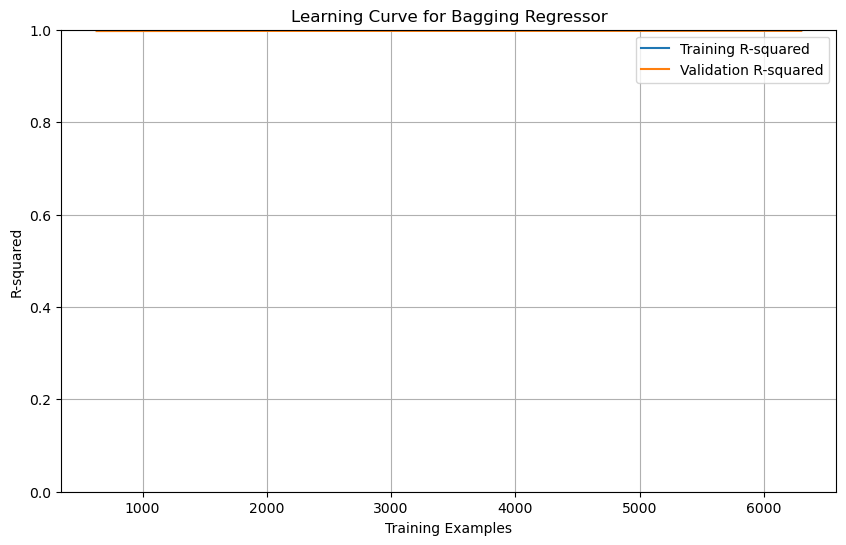

In [497]:
from sklearn.model_selection import learning_curve
#Generate the learning curve
train_sizes, train_scores, test_scores = learning_curve(bagging_regressor, X_train, y_train, cv=10, train_sizes=np.linspace(0.1, 1.0, 5), scoring='r2')

#Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Training R-squared")
plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Validation R-squared")

plt.xlabel("Training Examples")
plt.ylabel("R-squared")
plt.title("Learning Curve for Bagging Regressor")
plt.legend(loc="best")
plt.grid()
plt.ylim(0.0, 1.0)  # Adjust y-axis limits for better visualization
plt.show()

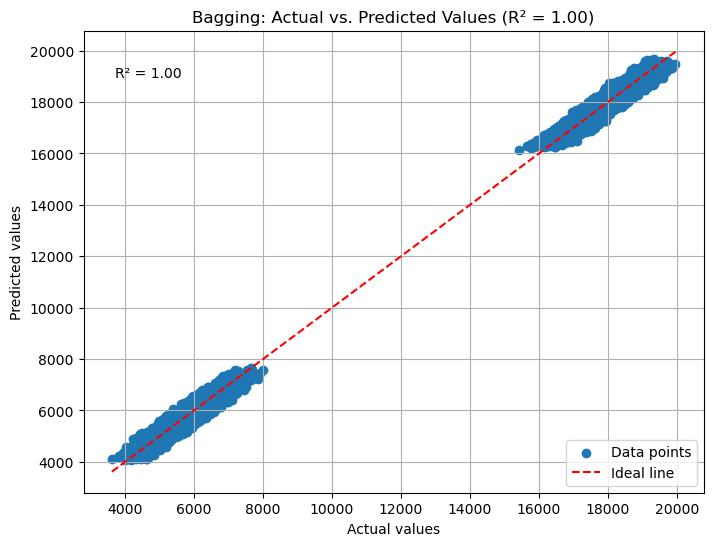

In [498]:
# Create the plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_bagging, label='Data points')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title(f'Bagging: Actual vs. Predicted Values (R² = {r2_bagging:.2f})')

# Add R-squared annotation
plt.annotate(f'R² = {r2_bagging:.2f}', xy=(0.05, 0.9), xycoords='axes fraction')

# Plot the ideal line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Ideal line')

plt.legend()
plt.grid(True)
plt.show()

In [499]:
y_test[1:100]

array([18341.62, 19570.67,  7553.72, 18981.01,  5292.95,  6485.57,
        6459.68,  6505.49, 18461.98,  4889.44,  5600.51, 17623.26,
       17543.87, 17396.95, 18637.97,  6718.91, 17638.99,  6622.76,
        5855.65,  6976.08,  4842.92, 18434.36,  6141.19,  5566.06,
        5956.16, 17614.94, 17823.67, 17235.94,  6152.95,  5055.23,
       18896.33, 17741.84,  7383.47,  7287.08,  4150.06,  7052.97,
       18158.17,  6752.93,  5914.87,  4703.78, 19338.78,  4519.7 ,
       17778.97, 16945.13, 16713.16, 18067.16, 18559.17,  6595.54,
       17597.54,  6551.  , 18092.53, 18565.07,  6215.69, 19377.32,
        6652.18,  6815.41,  6280.14, 17776.22, 16669.99, 16998.24,
        5951.17,  6478.56, 19271.43, 18863.68, 18207.3 ,  6261.62,
       16504.82, 18922.44, 17320.28, 17014.42, 18716.54,  5427.15,
       15888.78,  5939.35, 18215.82, 17730.32,  6155.41, 18059.13,
       18653.  ,  5888.19, 17206.66, 18471.86,  6211.77,  5980.96,
       17129.43,  6517.86,  6434.97,  6285.48,  5427.47,  5960

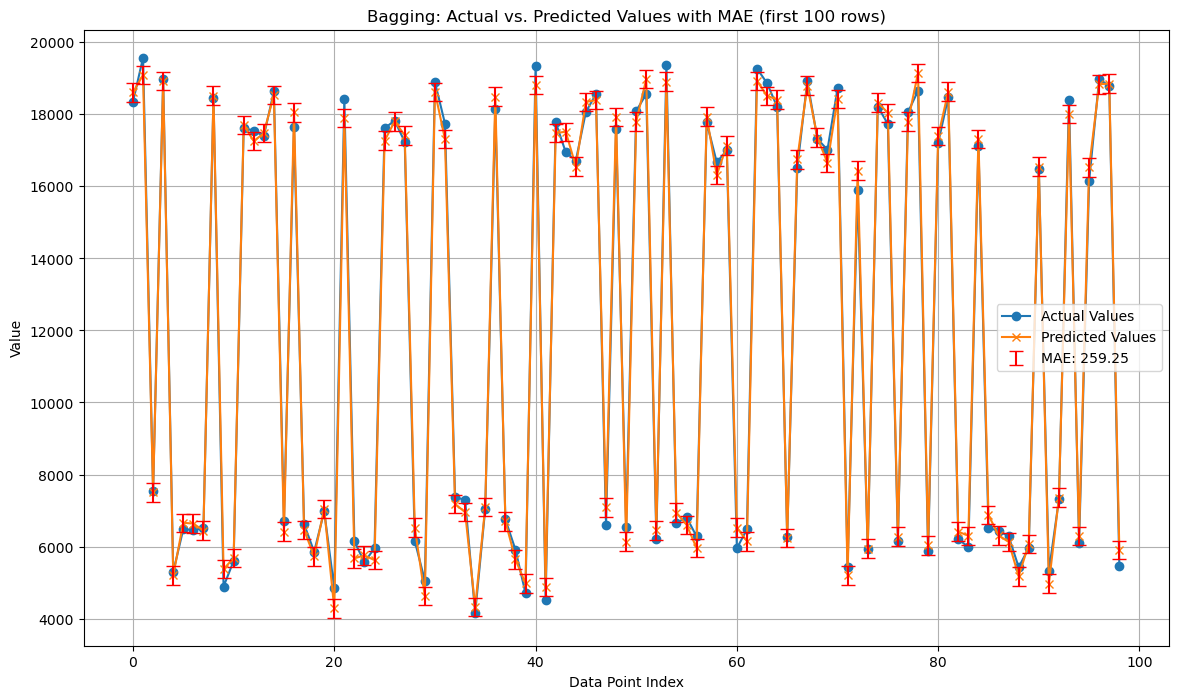

In [500]:
# Create plot to visualize MAE
plt.figure(figsize=(14, 8))
plt.plot(y_test[1:100], label='Actual Values', marker='o')
plt.plot(y_pred_bagging[1:100], label='Predicted Values', marker='x')

# Add error bars to visualize the MAE
x_coords = np.arange(len(y_test[1:100]))
plt.errorbar(x_coords, y_pred_bagging[1:100], yerr=mae, fmt='none', ecolor='red', capsize=5, label=f'MAE: {mae_bagging:.2f}')

plt.xlabel('Data Point Index')
plt.ylabel('Value')
plt.title('Bagging: Actual vs. Predicted Values with MAE (first 100 rows)')
plt.legend()
plt.grid(True)
plt.show()

In [501]:
joblib.dump(bagging_regressor, 'Bagging_regression_model_newdata.joblib')

['Bagging_regression_model_newdata.joblib']

In [502]:
predict_value('XGB_regression_model_newdata.joblib', input_data_array_T)

array([5564.3984], dtype=float32)

In [503]:
predict_value('Bagging_regression_model_newdata.joblib', input_data_array_T)

array([5519.6070584])

In [504]:
from sklearn.ensemble import RandomForestRegressor
# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(max_depth=5, random_state=42,max_features=5,max_leaf_nodes=15,n_estimators=200) # You can adjust n_estimators

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

joblib.dump(rf_model, 'RF_regression_model_newdata.joblib')

predict_value('RF_regression_model_newdata.joblib', input_data_array_T)

Mean Squared Error: 157689.27622463016
R-squared: 0.9957037954310677


array([5330.54900725])